### Sprint2 機械学習スクラッチ入門

このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。


スクラッチの意義
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。


スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。


以下のような効果を狙っています。


・新たな手法に出会った時に理論・数式を理解しやすくする

・ライブラリを使う上での曖昧さを減らす

・既存の実装を読みやすくする

### 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import random
from sklearn.metrics import accuracy_score

In [2]:
def scratch_train_test_split(X, y, train_size=0.8):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    
    X_train_num = round(X.shape[0]*train_size)
    
    
    y_train_num = round(y.shape[0]*train_size)
    
    
    X_train = X[0:X_train_num]
    X_test = X[X_train_num:]
    
    y_train = y[0:y_train_num]
    y_test = y[y_train_num:]
    
    return X_train, X_test, y_train, y_test

In [3]:
# スクラッチ関数を呼び出して確認
X = np.arange(1,41,1).reshape(10,4)
y = np.arange(1,11,1).reshape(10,)
print('X_train:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[0]))
print('X_test:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[1]))
print('y_train:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[2]))
print('y_test:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[3]))

X_train:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]
X_test:
[[33 34 35 36]
 [37 38 39 40]]
y_train:
[1 2 3 4 5 6 7 8]
y_test:
[ 9 10]


In [4]:
# sklearnを用いて確認
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=False)
print('X_train:\n{}'.format(X_train))
print('X_test:\n{}'.format(X_test))
print('y_train:\n{}'.format(y_train))
print('y_test:\n{}'.format(y_test))

X_train:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]
X_test:
[[33 34 35 36]
 [37 38 39 40]]
y_train:
[1 2 3 4 5 6 7 8]
y_test:
[ 9 10]


どちらも同様の結果になることを確認できた。

### scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。
検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。


#### 分類問題
分類は3種類の手法をスクラッチします。


>ロジスティック回帰

>SVM

>決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。

データセットは3種類用意します。


1つ目は事前学習期間同様にirisデータセットです。
2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。


virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

### 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

### irisデータ

In [5]:
# irisデータセット
from sklearn.datasets import load_iris
iris = load_iris()

# ラベル「virgicolorとvirginica」のデータを格納
X = iris.data
y = iris.target
X = X[50:150]
y = y[50:150]

#　scratch_train_test_split（）で分割
X_train_1 = scratch_train_test_split(X, y, train_size=0.8)[0]
X_test_1 = scratch_train_test_split(X, y, train_size=0.8)[1]
y_train_1 = scratch_train_test_split(X, y, train_size=0.8)[2]
y_test_1 = scratch_train_test_split(X, y, train_size=0.8)[3]

print('X_train:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[0]))
print('X_test:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[1]))
print('y_train:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[2]))
print('y_test:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[3]))

X_train:
[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7

#### irisデータ  
#### ロジスティック回帰

In [6]:
# スクラッチ関数を呼び出した値で評価
from sklearn import linear_model

SGDC_1 = linear_model.SGDClassifier(loss="log")

SGDC_1.fit(X_train_1,y_train_1)
y_pred_1 = SGDC_1.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1, y_pred_1))

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
0.9


In [7]:
# sklearnのtrain_test_splitを用いて評価

SGDC_2 = linear_model.SGDClassifier(loss="log")

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)
SGDC_2.fit(X_train_2,y_train_2)

y_pred_2 = SGDC_2.predict(X_test_2)

print(y_pred_2)
accuracy_score(y_test_2, y_pred_2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


1.0

#### irisデータ  
#### SVC

In [8]:
# スクラッチ関数を呼び出した値で評価
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_1,y_train_1)
y_pred_1 = svc.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
0.9


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.svm import SVC

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

svc = SVC()
svc.fit(X_train_2,y_train_2)
y_pred_2 = svc.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
0.9


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### irisデータ  
#### 決定木

In [10]:
# スクラッチ関数を呼び出した値で評価
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_1,y_train_1)
y_pred_1 = DT.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
0.95


In [11]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.tree import DecisionTreeClassifier

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

DT_2 = DecisionTreeClassifier()
DT_2.fit(X_train_2,y_train_2)
y_pred_2 = DT_2.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
0.85


### シンプルデータセット1

In [12]:
# シンプルデータセット1
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [13]:
# スクラッチ関数を呼び出す
X_train_1 = scratch_train_test_split(X, y, train_size=0.8)[0]
X_test_1 = scratch_train_test_split(X, y, train_size=0.8)[1]
y_train_1 = scratch_train_test_split(X, y, train_size=0.8)[2]
y_test_1 = scratch_train_test_split(X, y, train_size=0.8)[3]

print('X_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[0]))
print('X_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[1]))
print('y_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[2]))
print('y_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[3]))

X_train_1:
[[ 7.72382751e-01 -2.29167329e+00]
 [-5.93349449e-01  1.66788336e+00]
 [-2.07648560e+00  4.87468451e-01]
 [ 1.19226877e-01  3.62537974e+00]
 [-3.13000578e+00 -1.56731551e-01]
 [-1.78109832e+00  1.22224904e+00]
 [ 3.99770982e+00  1.25164011e+00]
 [ 2.15604470e+00 -3.85824429e-01]
 [ 1.94741552e+00 -1.29638961e+00]
 [ 1.58757396e+00 -1.85989193e+00]
 [ 2.05369045e+00 -9.47185530e-01]
 [-1.97439392e+00  1.22718715e+00]
 [-3.47487306e+00  3.70421433e-01]
 [ 1.68094977e+00 -6.36507554e-01]
 [-9.51997101e-01  1.41989638e+00]
 [-1.23054341e+00  2.48848983e+00]
 [-6.96789478e-01  1.88359001e+00]
 [ 1.03842491e+00 -8.88815671e-01]
 [ 3.68706491e+00  4.30242556e-01]
 [-1.03002856e+00  1.27865865e+00]
 [-1.26658152e+00  1.97258945e+00]
 [-1.97638843e-02  2.54412654e+00]
 [ 8.60592217e-01 -2.46186096e+00]
 [ 1.18894987e+00 -8.80504418e-01]
 [-1.87575023e+00  1.56364771e+00]
 [ 2.46165485e+00 -2.00601784e+00]
 [-1.59848154e+00  1.10652913e+00]
 [ 3.98744618e+00 -1.36849117e-01]
 [-9.9950

#### シンプルデータセット1
#### ロジスティック回帰

In [14]:
# スクラッチ関数を呼び出した値で評価
from sklearn import linear_model

SGDC_1 = linear_model.SGDClassifier(loss="log")

SGDC_1.fit(X_train_1,y_train_1)
y_pred_1 = SGDC_1.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1, y_pred_1))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


In [15]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.svm import SVC

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

svc = SVC()
svc.fit(X_train_2,y_train_2)
y_pred_2 = svc.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### シンプルデータセット1
#### SVC

In [16]:
# スクラッチ関数を呼び出した値で評価
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_1,y_train_1)
y_pred_1 = svc.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.svm import SVC

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

svc = SVC()
svc.fit(X_train_2,y_train_2)
y_pred_2 = svc.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### シンプルデータセット1
#### 決定木

In [18]:
# スクラッチ関数を呼び出した値で評価
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_1,y_train_1)
y_pred_1 = DT.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


In [19]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.tree import DecisionTreeClassifier

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

DT_2 = DecisionTreeClassifier()
DT_2.fit(X_train_2,y_train_2)
y_pred_2 = DT_2.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[-1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1 -1]
1.0


### シンプルデータセット2

In [20]:
# シンプルデータセット2

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# スクラッチ関数を呼び出す
X_train_1 = scratch_train_test_split(X, y, train_size=0.8)[0]
X_test_1 = scratch_train_test_split(X, y, train_size=0.8)[1]
y_train_1 = scratch_train_test_split(X, y, train_size=0.8)[2]
y_test_1 = scratch_train_test_split(X, y, train_size=0.8)[3]

print('X_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[0]))
print('X_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[1]))
print('y_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[2]))
print('y_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[3]))

X_train_1:
[[-0.44699  -2.8073  ]
 [-1.4621   -2.4586  ]
 [ 0.10645   1.9242  ]
 [-3.5944   -4.0112  ]
 [-0.9888    4.5718  ]
 [-3.1625   -3.9606  ]
 [ 0.56421   0.72888 ]
 [-0.60216   8.4636  ]
 [-0.61251  -0.75345 ]
 [-0.73535  -2.2718  ]
 [-0.80647  -2.2135  ]
 [ 0.86291   2.3946  ]
 [-3.1108    0.15394 ]
 [-2.9362    2.5462  ]
 [-0.57242  -2.9915  ]
 [ 1.4771    3.4896  ]
 [ 0.58619   0.37158 ]
 [ 0.6017    4.3439  ]
 [-2.1086    8.3428  ]
 [-4.1013   -4.353   ]
 [-1.9948   -1.3927  ]
 [ 0.35084  -0.031994]
 [ 0.96765   7.8929  ]
 [-1.281    15.6824  ]
 [ 0.96765  10.083   ]
 [ 1.3763    1.3347  ]
 [-2.234    -2.5323  ]
 [-2.9452   -1.8219  ]
 [ 0.14654  -0.28733 ]
 [ 0.5461    5.8245  ]
 [-0.65259   9.3444  ]
 [ 0.59912   5.3524  ]]
X_test_1:
[[ 0.50214  -0.31818 ]
 [-3.0603   -3.6461  ]
 [-6.6797    0.67661 ]
 [-2.353    -0.72261 ]
 [ 1.1319    2.4023  ]
 [-0.12243   9.0162  ]
 [-2.5677   13.1779  ]
 [ 0.057313  5.4681  ]]
y_train_1:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1

#### シンプルデータセット2
#### ロジスティック回帰

In [22]:
# スクラッチ関数を呼び出した値で評価
from sklearn import linear_model

SGDC_1 = linear_model.SGDClassifier(loss="log")

SGDC_1.fit(X_train_1,y_train_1)
y_pred_1 = SGDC_1.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1, y_pred_1))

[0 1 1 1 0 0 0 0]
0.375


In [23]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.svm import SVC

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

svc = SVC()
svc.fit(X_train_2,y_train_2)
y_pred_2 = svc.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[0 0 0 1 0 1 0 1]
0.375


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### シンプルデータセット2
#### SVC

In [24]:
# スクラッチ関数を呼び出した値で評価
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_1,y_train_1)
y_pred_1 = svc.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[0 0 0 1 0 1 0 1]
0.375


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.svm import SVC

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

svc = SVC()
svc.fit(X_train_2,y_train_2)
y_pred_2 = svc.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[0 0 0 1 0 1 0 1]
0.375


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### シンプルデータセット2
#### 決定木

In [26]:
# スクラッチ関数を呼び出した値で評価
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_1,y_train_1)
y_pred_1 = DT.predict(X_test_1)

print(y_pred_1)
print(accuracy_score(y_test_1,y_pred_1))

[1 0 0 1 0 0 0 1]
0.375


In [27]:
# sklearnのtrain_test_splitを用いて評価
from sklearn.tree import DecisionTreeClassifier

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

DT_2 = DecisionTreeClassifier()
DT_2.fit(X_train_2,y_train_2)
y_pred_2 = DT_2.predict(X_test_2)

print(y_pred_2)
print(accuracy_score(y_test_2,y_pred_2))

[1 0 0 0 0 0 0 1]
0.25


### 回帰問題


回帰は1種類をスクラッチします。


線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。


sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation


データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。


House Prices: Advanced Regression Techniques


train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

### 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [28]:
train_data = pd.read_csv("train.csv")

In [29]:
X = train_data[["GrLivArea","YearBuilt"]]
y = train_data[["SalePrice"]]

In [30]:
from sklearn.preprocessing import StandardScaler

#　scratch_train_test_split（）で分割
X_train_1 = scratch_train_test_split(X, y, train_size=0.8)[0].values
X_test_1 = scratch_train_test_split(X, y, train_size=0.8)[1].values
y_train_1 = scratch_train_test_split(X, y, train_size=0.8)[2].values
y_test_1 = scratch_train_test_split(X, y, train_size=0.8)[3].values

print('X_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[0]))
print('X_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[1]))
print('y_train_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[2]))
print('y_test_1:\n{}'.format(scratch_train_test_split(X, y, train_size=0.8)[3]))

scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)


X_train_1:
      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1163       1258       1969
1164       1432       1978
1165       1502       2009
1166       1694       2008
1167       1671       2000

[1168 rows x 2 columns]
X_test_1:
      GrLivArea  YearBuilt
1168       2108       1935
1169       3627       1995
1170       1118       1977
1171       1261       1958
1172       1250       2006
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[292 rows x 2 columns]
y_train_1:
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1163     108959
1164     194000
1165     233170
1166     245350
1167     173000

[1168 rows x 1 columns]
y_test_1:
      SalePrice
1168     235000
1169     625

In [31]:
# スクラッチ関数を呼び出した値で評価
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

SGDR_1 = SGDRegressor(eta0=0.001)

SGDR_1.fit(X_train_1,y_train_1)
y_pred_1 = SGDR_1.predict(X_test_1)

MSE = mean_squared_error(y_test_1,y_pred_1)

print(y_pred_1)
print("平均二乗誤差：{:.3g}".format(MSE))
print(SGDR_1.score(X_test_1,y_test_1))

[203951.07674893 417367.25016484 147770.01014105 142663.55249115
 190631.74074203 313111.61843248 224612.21120592 338711.28098621
 135402.95759914 106246.19352836 113048.83636989 124858.25601419
 300824.457846   232923.75799511 503389.75390819  90701.41116712
 178911.67029813 103901.27743517 127222.96099908 215808.51900665
 227591.01653188 238941.17252304 181873.01074999 202598.32109186
 130053.1884627  180872.70467156 163019.38558116 210233.77765954
 252004.10417815 142678.39415993 181715.85004446 159889.24117437
 115184.05912208 235415.94034798 117638.55050825 222542.91314216
 141320.25407905 268986.91857571 130317.60044362 232618.01942724
 148955.27344585 231680.14043014 235890.0456699  222489.9433058
  66315.24563991 119683.98685915 120521.74780823 114098.47666441
 227284.84076312 200106.13873899  96477.26301204 151648.12909564
 113856.03957964 147880.45983581 192032.08181165 223110.87768651
 212615.51031765 130349.03258472 260034.6485141  114878.3205542
 237929.6603961  169337.154

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


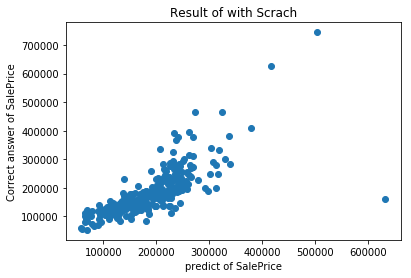

In [32]:
plt.scatter(y_pred_1,y_test_1)
plt.title("Result of with Scrach")
plt.xlabel("predict of SalePrice")
plt.ylabel("Correct answer of SalePrice")
plt.show()

スクラッチによるデータ分割より　SGDRegressor　で学習した結果（横軸）と正解値（y軸）をグラフ化したものが上記となる。
上記よりほぼ同じ予想値を計算できていることが分かる。

In [33]:
# sklearnを呼び出した値で評価
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.8,shuffle=False)

scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)


SGDR_2 = SGDRegressor()

SGDR_2.fit(X_train_2,y_train_2)
y_pred_2 = SGDR_2.predict(X_test_2)

MSE = mean_squared_error(y_test_2,y_pred_2)

print(y_pred_2)
print("平均二乗誤差：{:.3g}".format(MSE))

[204753.43358176 419852.58389383 147558.6751566  142585.37550564
 190591.04969296 314969.2134725  225664.47470847 340387.62037706
 134990.65076252 106095.70272162 113020.24309248 124629.73736058
 302116.60236876 233314.22919755 506782.37022775  90444.42747757
 179170.59521209 103745.53314924 127552.83939635 216154.74377102
 227983.87378579 239484.66447717 182183.25653296 202754.33213284
 130166.39732913 180797.08111707 163049.62705085 210411.95378129
 252617.75417527 143015.07485318 181629.46836118 159945.35238723
 114694.41519088 235931.72071001 117619.39674869 222901.69602251
 141059.90055359 269939.61700926 130028.8027794  233054.59988123
 148904.68246723 232077.09999924 236470.12363426 222966.64698549
  65590.91134141 119291.68932505 120168.00371849 113636.75363399
 227911.40473465 200136.84062037  96015.26791404 151537.38469162
 113411.4793212  147759.16661167 192569.12732823 223959.53211501
 212828.95383869 130139.56041375 260724.04492727 114434.78587456
 238373.50362514 169523.6

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


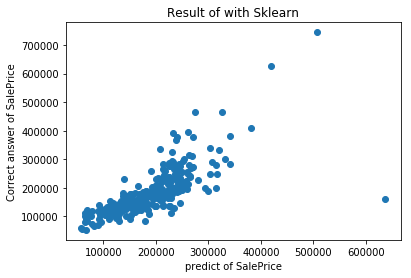

In [34]:
plt.scatter(y_pred_2,y_test_2)
plt.title("Result of with Sklearn")
plt.xlabel("predict of SalePrice")
plt.ylabel("Correct answer of SalePrice")
plt.show()

Sklearnによるデータ分割より　SGDRegressor　で学習した結果（横軸）と正解値（y軸）をグラフ化したものが上記となる。 上記よりほぼ同じ予想値を計算できていることが分かる。

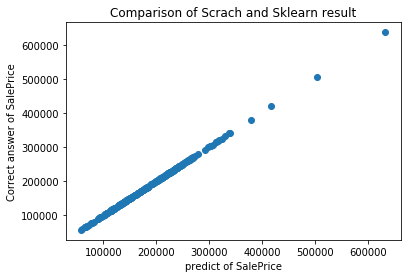

In [36]:
plt.scatter(y_pred_1,y_pred_2)
plt.title("Comparison of Scrach and Sklearn result")
plt.xlabel("predict of SalePrice")
plt.ylabel("Correct answer of SalePrice")
plt.show()

スクラッチ　及び　Sklearnでデータ分割したものでSGDRegressor　で学習した予測値同士で確認したグラフが上記となる。

スクラッチを元にした予測値：x軸
Sklearnを元にした予測値：y軸

これよりどちらも同じ予測値をしているため、今回のtrain_test_split のスクラッチは正しく作成できていることを確認できた。